In [1]:
#%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from Oinfo import multi_order_meas
import os

def generate_herarchical_synergy(alpha=1.0, beta=1.0, n=1000):
    # Generate base random variables
    Z1, Z2, Z3, Z4, Z5, Z6 = np.random.normal(0, 1, (6, n))
    
    # Generate dependent variables
    X1 = Z1
    X2 = Z2 + alpha*np.exp(Z3)
    X3 = (np.log(alpha*np.abs(Z2) + 1) + 1) * Z3
    X4 = np.sin(Z4) + alpha*np.cos(Z5)
    X5 = (Z4 / (Z4-alpha*(Z4+1))) * np.sin(Z5)
    X6 = Z6 + beta*(np.sin(X2 + X3) + np.cos(X4 + X5))
    
    return pd.DataFrame({
        'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'X6': X6
    })

def generate_flat_synergy(alpha=1.0, beta=1.0, gamma=1.0, n=1000):
    # Generate random samples
    Z00, Z01, Z1, Z2, Z3, Z4, Z5, Z6 = [np.random.normal(0, 1, n) for _ in range(8)]

    # Define the variables
    X1 = alpha*np.log(np.abs(Z00) + 1) +     beta*Z01   +  gamma*Z1
    X2 = alpha*Z00                     +     beta*Z01   +  gamma*Z2
    X3 = alpha*np.power(Z00,2)         +     beta*Z01   +  gamma*Z3
    X4 = alpha*np.exp(Z00)             +     beta*Z01   +  gamma*Z4
    X5 = alpha*np.sin(Z00)             +     beta*Z01   +  gamma*Z5
    X6 = alpha*np.cos(Z00)             +     beta*Z01   +  gamma*Z6

    return pd.DataFrame({
        'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'X6': X6
    })

/home/laouen.belloli/Documents/git/Oinformation/Oinfo/oinfo.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


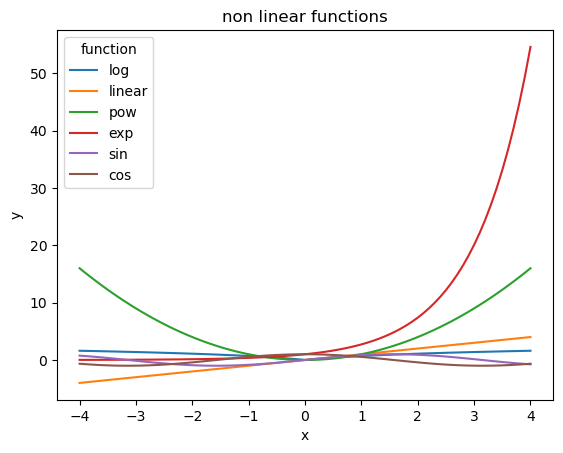

In [2]:
def plot_non_linear_values():
    
    fig = plt.figure()
    X = np.arange(-4,4.1,0.1)

    Y1 = np.log(np.abs(X) + 1)
    Y2 = X
    Y3 = np.power(X,2)
    Y4 = np.exp(X)
    Y5 = np.sin(X)
    Y6 = np.cos(X)

    df = pd.concat([
        pd.DataFrame({'x': X, 'y': Y, 'function': func})
        for (Y, func) in [
            (Y1, 'log'),
            (Y2, 'linear'),
            (Y3, 'pow'),
            (Y4, 'exp'),
            (Y5, 'sin'),
            (Y6, 'cos')
        ]
    ])

    sns.lineplot(x='x', y='y', data=df, hue='function')
    plt.title('non linear functions')
    plt.show()
    plt.close(fig)

plot_non_linear_values()

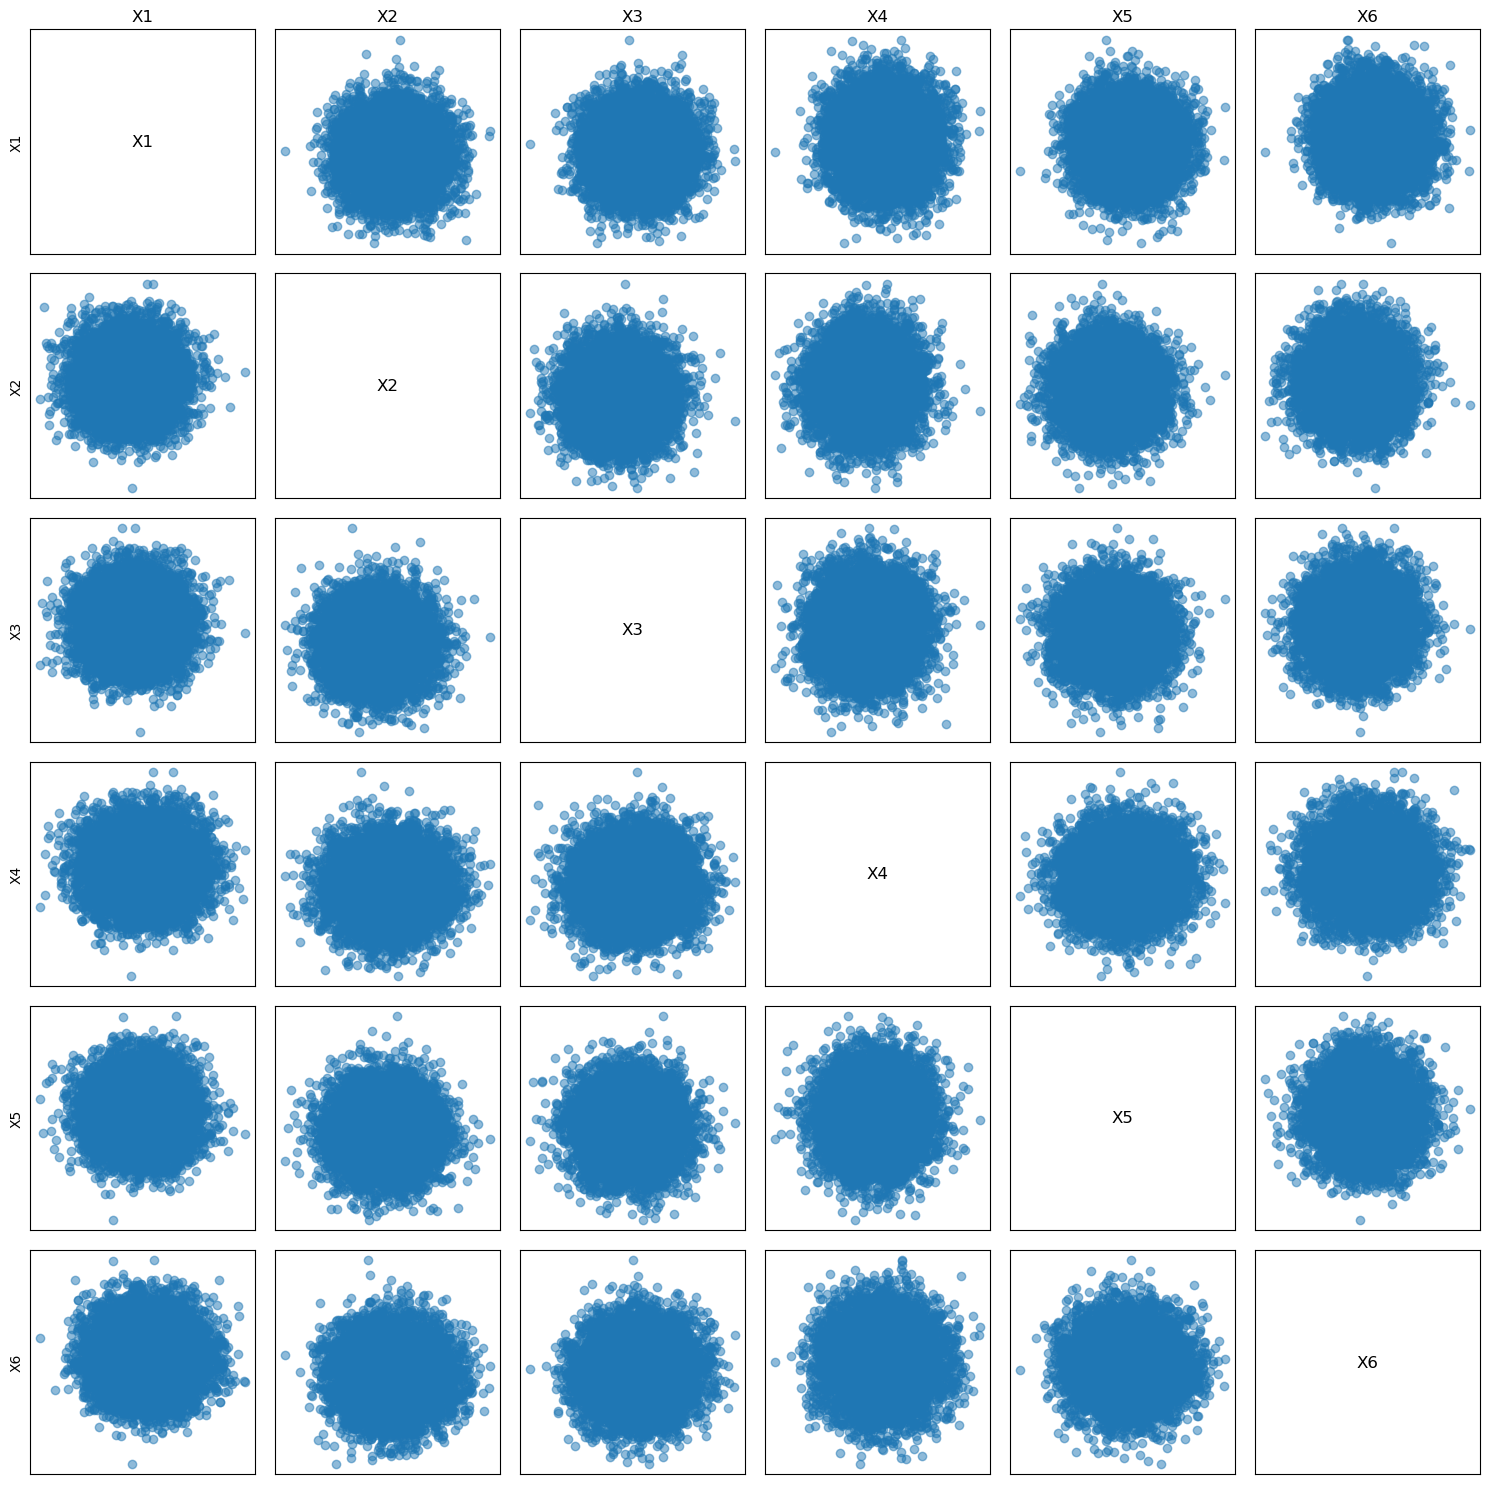

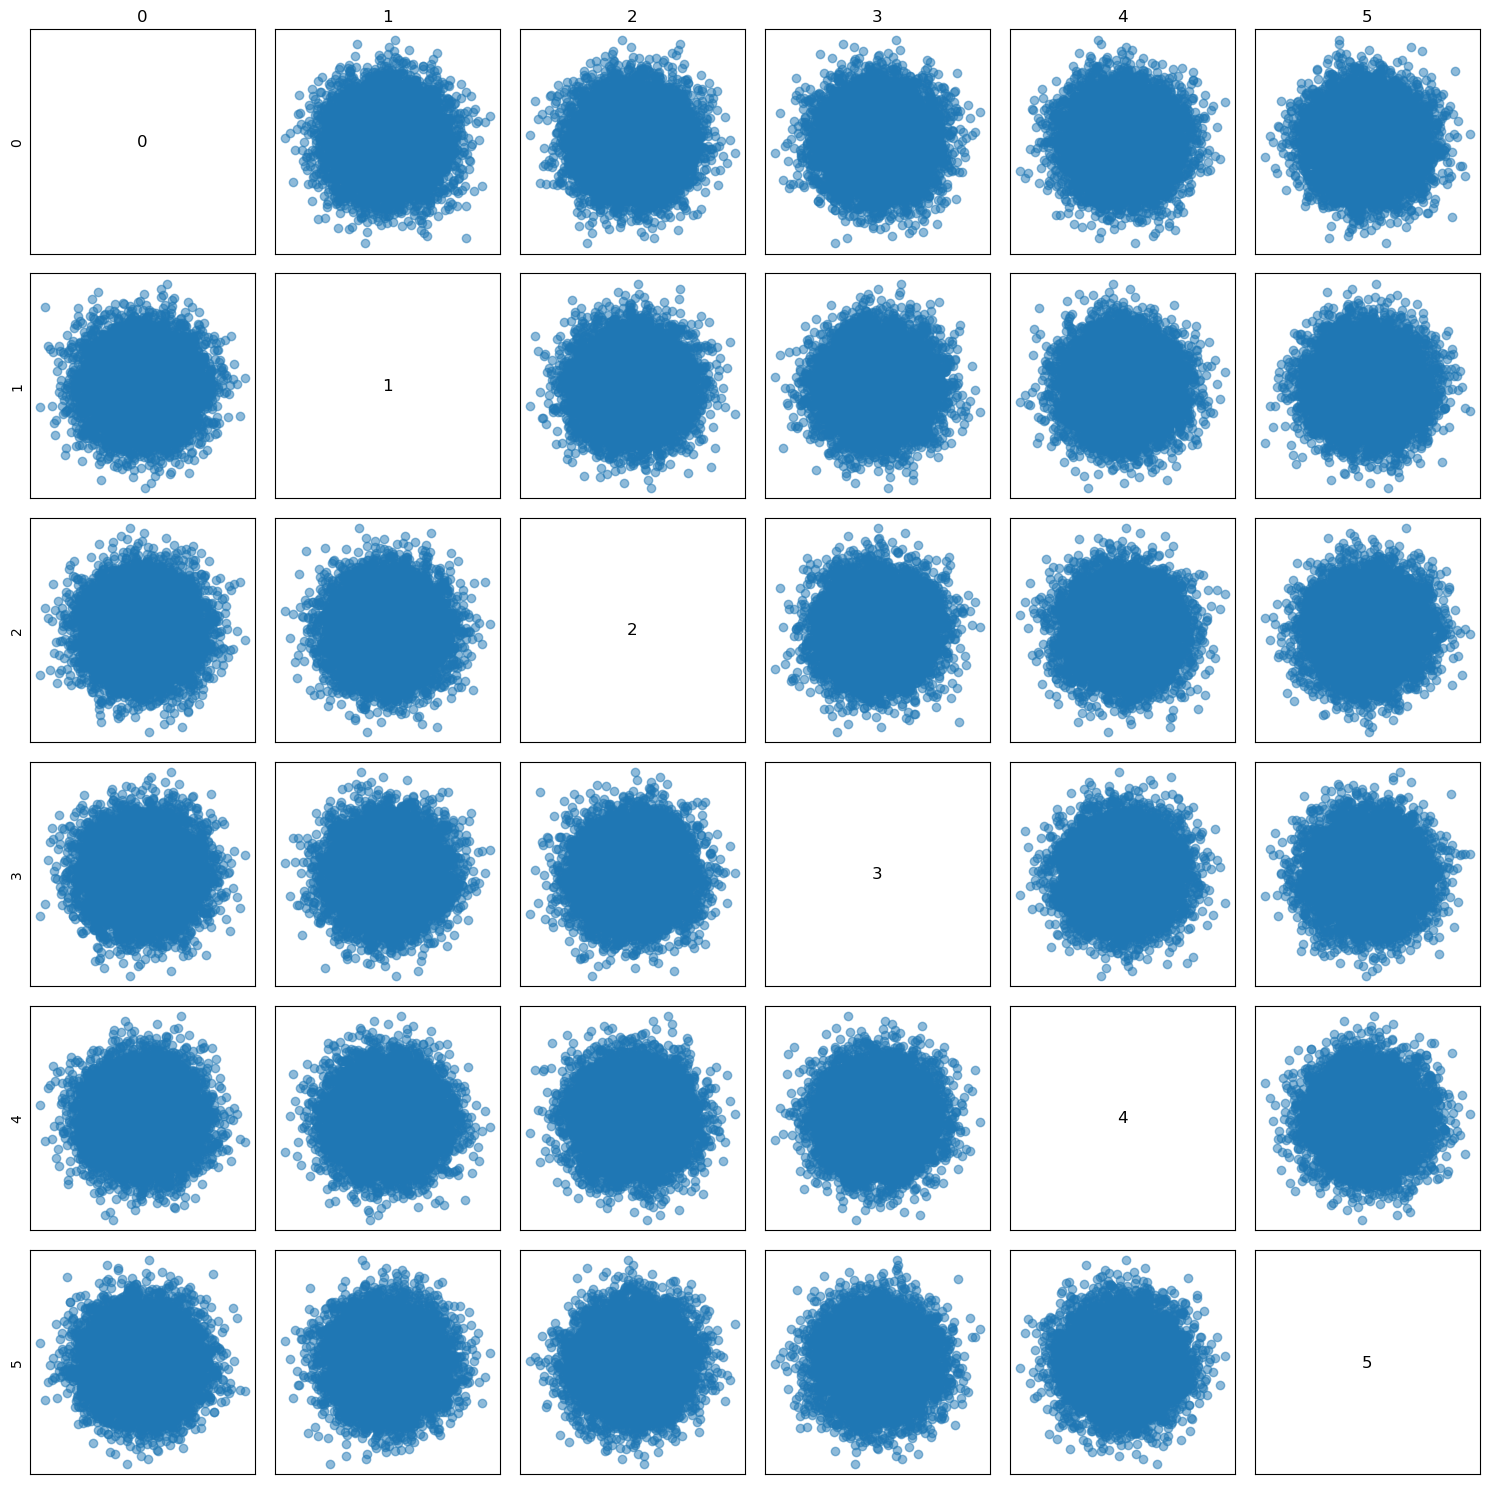

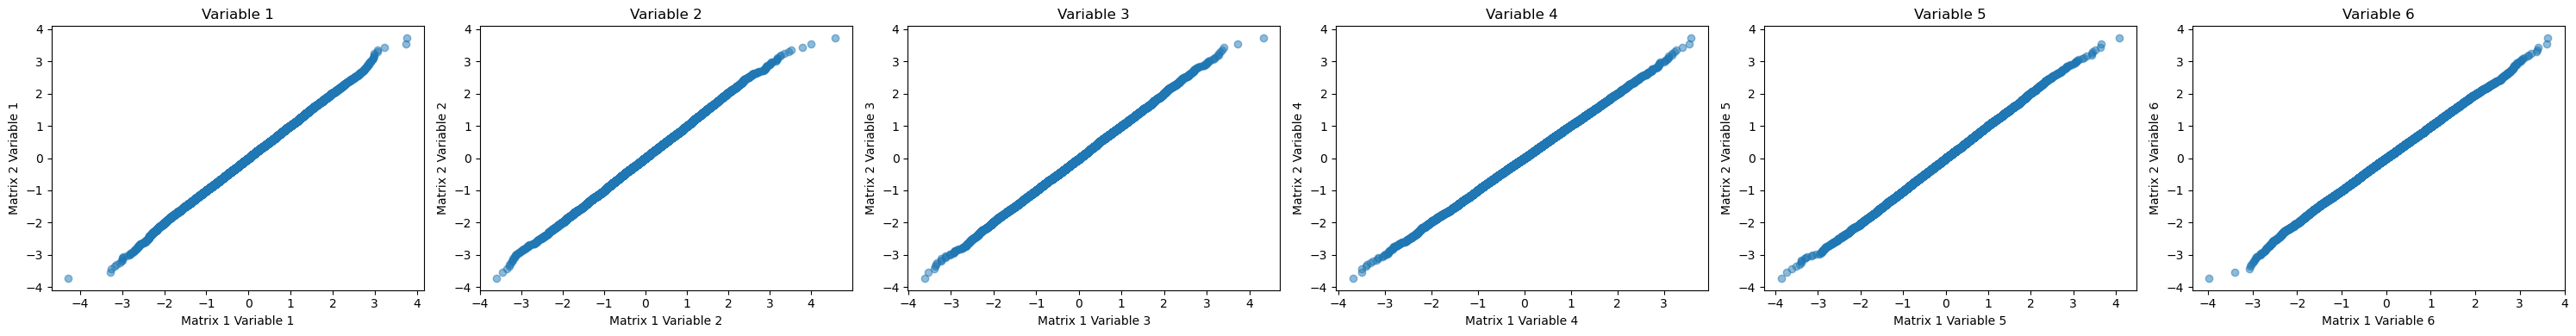

In [3]:
from Oinfo import data2gaussian

data = generate_flat_synergy(alpha=0., beta=0., gamma=1., n=10000)
gaussian_data,covmat = data2gaussian(data.values)


def update_plots(data):

    variables = data.keys()

    fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15, 15))  # Set the size as needed

    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            ax = axes[i, j]
            if i != j:
                ax.scatter(data[var1], data[var2], alpha=0.5)
            else:
                ax.text(0.5, 0.5, var1, horizontalalignment='center', verticalalignment='center', fontsize=12, transform=ax.transAxes)
            ax.set_xticks([])
            ax.set_yticks([])
            if i == 0:
                ax.set_title(var2)
            if j == 0:
                ax.set_ylabel(var1)

    plt.tight_layout()
    plt.show()

def plot_variable_pairs(matrix1, matrix2):
    """
    Plots scatter plots for each pair of corresponding variables from two matrices.
    
    Parameters:
    - matrix1 (np.ndarray): First data matrix of size T x N.
    - matrix2 (np.ndarray): Second data matrix of size T x N.
    """
    # Get the number of variables (columns)
    N = matrix1.shape[1]
    
    # Create a figure with subplots in a grid
    fig, axs = plt.subplots(1, N, figsize=(5 * N, 4))  # Adjust subplot size and figure size as needed
    
    # Iterate over each variable
    for i in range(N):
        ax = axs[i] if N > 1 else axs  # Handling both single and multiple subplots
        ax.scatter(matrix1[:, i], matrix2[:, i], alpha=0.5)  # Plot scatter plot of variable i
        ax.set_title(f'Variable {i+1}')
        ax.set_xlabel('Matrix 1 Variable {}'.format(i+1))
        ax.set_ylabel('Matrix 2 Variable {}'.format(i+1))
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


update_plots(data)
update_plots(pd.DataFrame(gaussian_data))

plot_variable_pairs(data.values, gaussian_data)

0it [00:00, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Saving chunk 0


Creating nplet matrix:   0%|          | 0/15 [00:00<?, ?it/s]

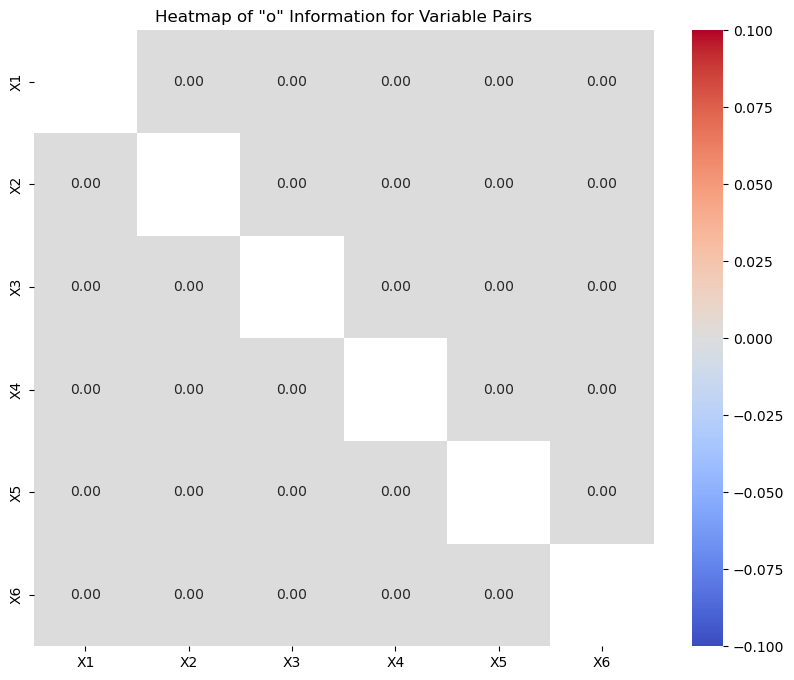

In [9]:

path = './'

# generate syntetic data
data = generate_flat_synergy(alpha=0., beta=0., gamma=1., n=10000)
multi_order_meas(data.values, max_n=2)

data = pd.read_csv(os.path.join(path, 'nplets_0.csv'))


# Define the variable labels based on the DataFrame's boolean columns
variable_labels = ['0', '1', '2', '3', '4', '5']
data['Pair'] = data[variable_labels].apply(
    lambda row: '-'.join([
        f'X{int(label)+1}'
        for label, value in zip(variable_labels, row)
        if value
    ]), axis=1)

# Initialize an empty DataFrame for the heatmap data
heatmap_data = pd.DataFrame(
    np.nan,
    index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'],
    columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
)

# Fill the DataFrame with 'o' values
for index, row in data.iterrows():
    pairs = row['Pair'].split('-')
    if len(pairs) == 2:
        i, j = pairs
        heatmap_data.loc[i, j] = row['o']
        heatmap_data.loc[j, i] = row['o']  # Assuming symmetry, fill both (i, j) and (j, i)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of "o" Information for Variable Pairs')
plt.show()

In [ ]:


@widgets.interact(alpha=(0., 1., 0.5), beta=(0., 1., 0.5), gamma=(0., 1., 0.5), n=(100,10000,1000))
def plot_synergy(alpha, beta, gamma, n):

    # generate syntetic data
    data = generate_flat_synergy(alpha=alpha, beta=beta, gamma=gamma, n=n)

    # rename variables

    data.rename({
        'X1': 'log',
        'X2': 'linear',
        'X3': 'pow',
        'X4': 'exp',
        'X5': 'sin',
        'X6': 'cos'
    }, axis=1, inplace=True)
    
    # Calculate the correlation matrix
    correlation_matrix = data.corr()

    # Create a heatmap of the correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1., vmax=1.)
    plt.title('Pairwise Correlations Heatmap')
    plt.show()
    plt.close()

In [13]:
@widgets.interact(alpha=(0., 1., 0.5), beta=(0., 1., 0.5), gamma=(0., 1., 0.5), n=(100,10000,1000))
def plot_correlations(alpha, beta, gamma, n):

    # generate syntetic data
    data = generate_flat_synergy(alpha=alpha, beta=beta, gamma=gamma, n=n)

    # rename variables

    data.rename({
        'X1': 'log',
        'X2': 'linear',
        'X3': 'pow',
        'X4': 'exp',
        'X5': 'sin',
        'X6': 'cos'
    }, axis=1, inplace=True)
    
    # Calculate the correlation matrix
    correlation_matrix = data.corr()

    # Create a heatmap of the correlations
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1., vmax=1.)
    plt.title('Pairwise Correlations Heatmap')
    plt.show()
    plt.close()


interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, step=0.5), FloatSlider(value=0.5, d…

In [5]:

@widgets.interact(alpha=(0., 1., 0.5), beta=(0., 1., 0.5), gamma=(0., 1., 0.5), n=(100,10000,1000))
def update_plots(alpha, beta, gamma, n):

    data = generate_flat_synergy(alpha=alpha, beta=beta, gamma=gamma, n=n)
    variables = data.keys()

    fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15, 15))  # Set the size as needed

    for i, var1 in enumerate(variables):
        for j, var2 in enumerate(variables):
            ax = axes[i, j]
            if i != j:
                ax.scatter(data[var1], data[var2], alpha=0.5)
            else:
                ax.text(0.5, 0.5, var1, horizontalalignment='center', verticalalignment='center', fontsize=12, transform=ax.transAxes)
            ax.set_xticks([])
            ax.set_yticks([])
            if i == 0:
                ax.set_title(var2)
            if j == 0:
                ax.set_ylabel(var1)

    plt.tight_layout()
    plt.show()

interactive(children=(FloatSlider(value=0.5, description='alpha', max=1.0, step=0.5), FloatSlider(value=0.5, d…